In [1]:
import pandas as pd
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [13]:
from sklearn.model_selection import train_test_split

X = df[["age", "interest"]].values
Y = df["success"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = 0.25) 

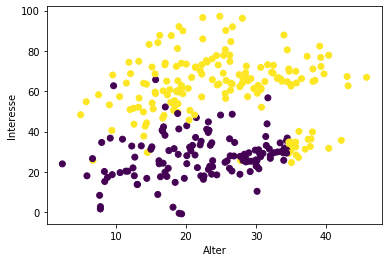

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

# in den Eckigen Klammern geben wir die Werte auf der X und Y Achse an
# 0 und 1 geben dabei die Spaltennummer an
# als Farbunterscheidung wird die Y Variable von oben verwendet
plt.scatter(X[:, 0], X[:, 1], c = Y )
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

Trainingsdaten

In [21]:
# Daten skalieren, damit beide Achsen den gleichen Zahlenbereich aufweisen, da es sonst zu fehlerhaften Modellen kommt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Zahlenbereich gibt Standardabweichung an vom Mittelpunkt

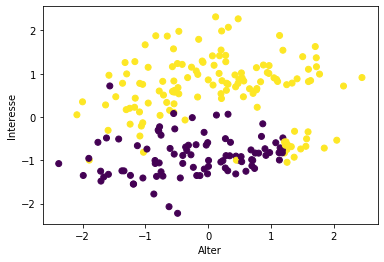

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

# in den Eckigen Klammern geben wir die Werte auf der X und Y Achse an
# 0 und 1 geben dabei die Spaltennummer an
# als Farbunterscheidung wird die Y Variable von oben verwendet
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train )
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))
Y_predict = model.predict(X_test)

0.88


/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


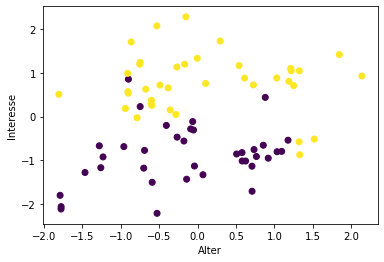

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

# in den Eckigen Klammern geben wir die Werte auf der X und Y Achse an
# 0 und 1 geben dabei die Spaltennummer an
# als Farbunterscheidung wird die Y Variable von oben verwendet
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

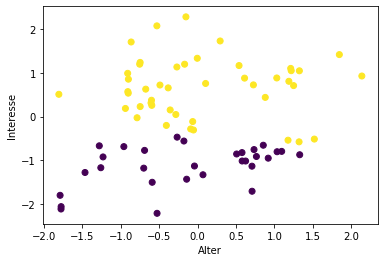

In [33]:
# Vorhergesagten Daten
%matplotlib inline

import matplotlib.pyplot as plt

# in den Eckigen Klammern geben wir die Werte auf der X und Y Achse an
# 0 und 1 geben dabei die Spaltennummer an
# als Farbunterscheidung wird die Y Variable von oben verwendet
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_predict)
plt.xlabel("Alter")
plt.ylabel("Interesse")
plt.show()

Eintscheidungsgrenze visualisieren

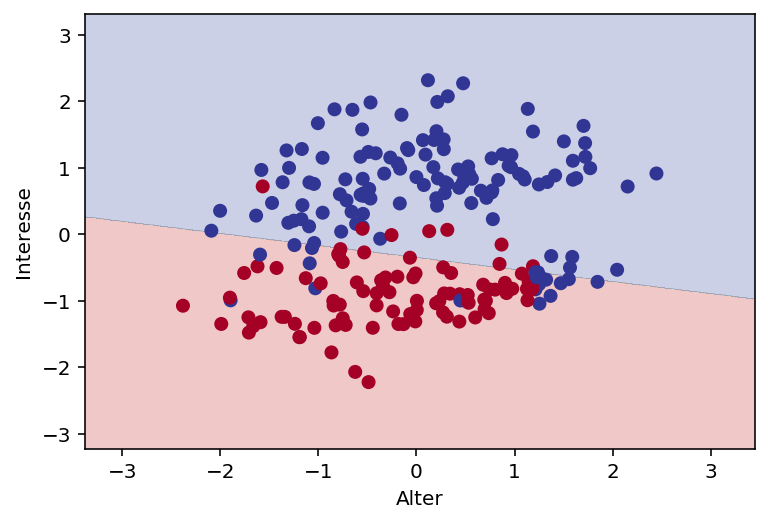

In [37]:
# Hintergrundfarbe gibt an, ob das Modell den Punkt blau oder rot klassifizieren würde
from helper import plot_classifier
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")

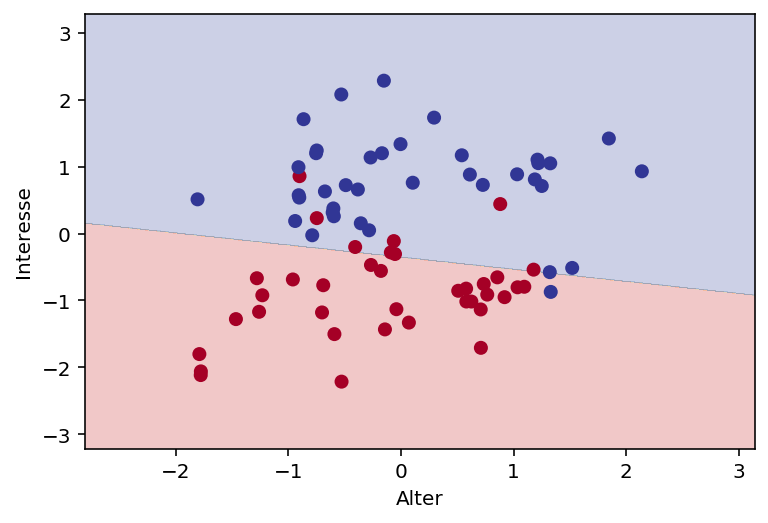

In [38]:
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")

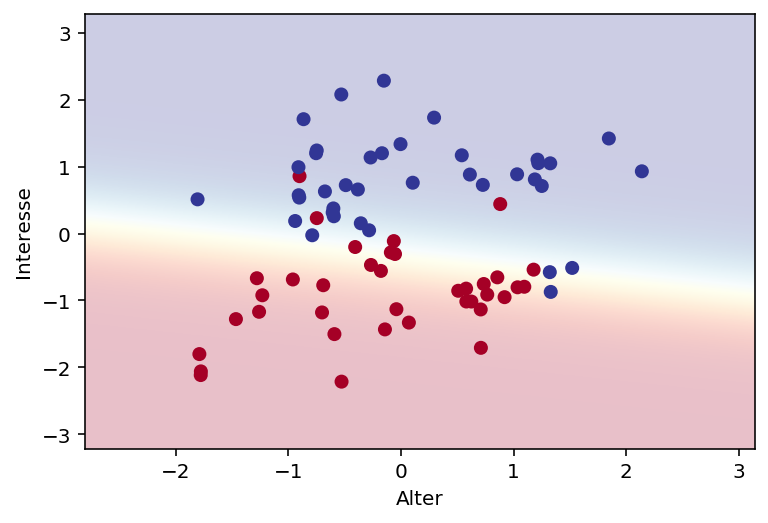

In [41]:
# Wahrscheinlichkeit mit einbezogen bei proba = true
# Übergang gibt an, an welcher Stelle unser Modell unsicher ist

plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Alter", ylabel = "Interesse")